# Model Performance Analysis & Visualization

**Comprehensive Model Comparison Dashboard**

This notebook creates:
1. **Master Table**: Complete model performance data
2. **Ranked View**: Models sorted by F2 score (primary metric)
3. **Visualizations**: F2 comparison, Recall vs F2 scatter, Training time analysis
4. **Slide Table**: Minimal stakeholder-ready summary

---


## Section 1: Imports and Setup


In [0]:
# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try to import adjustText for better label positioning
try:
    from adjustText import adjust_text
    HAS_ADJUSTTEXT = False
except ImportError:
    HAS_ADJUSTTEXT = False
    print("⚠️  adjustText not available. Install with: pip install adjusttext")
    print("   Will use alternative label positioning method")

# Set style for better-looking plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('default')
sns.set_palette("husl")

print("✅ Imports complete")


✅ Imports complete


## Section 2: Master Table (Models_Master)


In [0]:
# ============================================================
# CREATE MASTER TABLE WITH ALL MODEL RESULTS
# ============================================================

# Master table with all model performance data
models_master = pd.DataFrame([
    {
        'Model_ID': 'P2-LR-BASE',
        'Model_Name': 'Baseline Logistic Regression',
        'Phase': 2,
        'Metric_Scope': 'test',
        'Phase_Config': 'Non-engineered baseline features',
        'Train_Time_s': 329,
        'Threshold': None,
        'Precision': None,
        'Recall': None,
        'F0_5': None,
        'F1': None,
        'F2': 0.5476,
        'AUC_PR': None,
        'AUC_ROC': 0.5149
    },
    {
        'Model_ID': 'P2-LR-ENG',
        'Model_Name': 'Improved Logistic Regression',
        'Phase': 2,
        'Metric_Scope': 'test',
        'Phase_Config': 'Engineered features',
        'Train_Time_s': 161,
        'Threshold': None,
        'Precision': 0.4541,
        'Recall': 0.6450,
        'F0_5': 0.4827,
        'F1': None,
        'F2': 0.5950,
        'AUC_PR': 0.5662,
        'AUC_ROC': None
    },
    {
        'Model_ID': 'P2-RF-ENG',
        'Model_Name': 'Random Forest (Phase 2)',
        'Phase': 2,
        'Metric_Scope': 'test',
        'Phase_Config': 'Improved RF with engineered features',
        'Train_Time_s': 211,
        'Threshold': None,
        'Precision': 0.7814,
        'Recall': 0.3611,
        'F0_5': 0.6338,
        'F1': None,
        'F2': 0.4046,
        'AUC_PR': 0.6244,
        'AUC_ROC': None
    },
    {
        'Model_ID': 'P3-RF',
        'Model_Name': 'Random Forest (Phase 3 – final)',
        'Phase': 3,
        'Metric_Scope': 'test',
        'Phase_Config': 'Best RF from validation; maxDepth=15; numTrees=20',
        'Train_Time_s': 679,
        'Threshold': None,
        'Precision': 0.6474,
        'Recall': 0.6013,
        'F0_5': 0.6376,
        'F1': 0.6235,
        'F2': 0.6100,
        'AUC_PR': 0.6639,
        'AUC_ROC': 0.8711
    },
    {
        'Model_ID': 'P3-GBT',
        'Model_Name': 'Gradient-Boosted Trees (GBDT)',
        'Phase': 3,
        'Metric_Scope': 'test',
        'Phase_Config': 'Best GBT on validation; maxDepth=5; stepSize=0.1; subsamplingRate=0.8; numIters=90',
        'Train_Time_s': 1232,
        'Threshold': None,
        'Precision': 0.6407,
        'Recall': 0.6206,
        'F0_5': 0.6415,
        'F1': 0.6305,
        'F2': 0.6245,
        'AUC_PR': 0.7191,
        'AUC_ROC': 0.8945
    },
    {
        'Model_ID': 'ENS-M1-50_50',
        'Model_Name': 'MLP – 50:50 undersampling',
        'Phase': 3,
        'Metric_Scope': 'test',
        'Phase_Config': 'MLP with 50:50 undersampling; ensemble base model 1',
        'Train_Time_s': 1345.19,
        'Threshold': 0.15,
        'Precision': 0.3673,
        'Recall': 0.8208,
        'F0_5': None,
        'F1': 0.5075,
        'F2': 0.6582,
        'AUC_PR': 0.6017,
        'AUC_ROC': None
    },
    {
        'Model_ID': 'ENS-M2-40_60',
        'Model_Name': 'MLP – 40:60 undersampling',
        'Phase': 3,
        'Metric_Scope': 'test',
        'Phase_Config': 'MLP with 40:60 undersampling; ensemble base model 2',
        'Train_Time_s': 1050.73,
        'Threshold': 0.20,
        'Precision': 0.3668,
        'Recall': 0.8287,
        'F0_5': None,
        'F1': 0.5085,
        'F2': 0.6620,
        'AUC_PR': 0.5990,
        'AUC_ROC': None
    },
    {
        'Model_ID': 'ENS-M3-WEIGHTS',
        'Model_Name': 'MLP – Class weights',
        'Phase': 3,
        'Metric_Scope': 'test',
        'Phase_Config': 'MLP trained with class weights; ensemble base model 3',
        'Train_Time_s': 2340.69,
        'Threshold': 0.15,
        'Precision': 0.2824,
        'Recall': 0.1387,
        'F0_5': None,
        'F1': 0.1861,
        'F2': 0.1545,
        'AUC_PR': 0.2347,
        'AUC_ROC': None
    },
    {
        'Model_ID': 'ENS-AVG',
        'Model_Name': '3-Model Ensemble (average)',
        'Phase': 3,
        'Metric_Scope': 'test',
        'Phase_Config': 'Average of M1 50:50; M2 40:60; M3 weights; simple mean of probabilities',
        'Train_Time_s': 4736.61,
        'Threshold': 0.15,
        'Precision': 0.3939,
        'Recall': 0.7721,
        'F0_5': None,
        'F1': 0.5216,
        'F2': 0.6477,
        'AUC_PR': 0.5831,
        'AUC_ROC': None
    }
])

# ============================================================
# CALCULATE MISSING METRICS FROM AVAILABLE DATA
# ============================================================

def calculate_f1(precision, recall):
    """Calculate F1 score from precision and recall"""
    if pd.isna(precision) or pd.isna(recall) or (precision + recall) == 0:
        return None
    return 2 * (precision * recall) / (precision + recall)

def calculate_f0_5(precision, recall):
    """Calculate F0.5 score from precision and recall"""
    if pd.isna(precision) or pd.isna(recall) or (0.25 * precision + recall) == 0:
        return None
    return 1.25 * (precision * recall) / (0.25 * precision + recall)

def calculate_f2(precision, recall):
    """Calculate F2 score from precision and recall"""
    if pd.isna(precision) or pd.isna(recall) or (4 * precision + recall) == 0:
        return None
    return 5 * (precision * recall) / (4 * precision + recall)

# Fill missing F1 scores
for idx, row in models_master.iterrows():
    if pd.isna(row['F1']) and pd.notna(row['Precision']) and pd.notna(row['Recall']):
        models_master.at[idx, 'F1'] = calculate_f1(row['Precision'], row['Recall'])

# Fill missing F0.5 scores
for idx, row in models_master.iterrows():
    if pd.isna(row['F0_5']) and pd.notna(row['Precision']) and pd.notna(row['Recall']):
        models_master.at[idx, 'F0_5'] = calculate_f0_5(row['Precision'], row['Recall'])

# Verify F2 scores (optional - can recalculate to check consistency)
# Uncomment if you want to verify F2 matches calculated values
# for idx, row in models_master.iterrows():
#     if pd.notna(row['Precision']) and pd.notna(row['Recall']):
#         calculated_f2 = calculate_f2(row['Precision'], row['Recall'])
#         if pd.notna(row['F2']) and abs(row['F2'] - calculated_f2) > 0.0001:
#             print(f"Warning: F2 mismatch for {row['Model_ID']}: stored={row['F2']:.4f}, calculated={calculated_f2:.4f}")

print("="*70)
print("MASTER TABLE (Models_Master)")
print("="*70)
print(f"\nTotal models: {len(models_master)}")
print(f"\nColumns: {', '.join(models_master.columns)}")
print("\n✅ Calculated missing F1 and F0.5 scores from Precision and Recall")
print("\n" + "="*70)
print(models_master.to_string(index=False))
print("="*70)

# Show what was calculated
calculated_f1 = models_master[(models_master['F1'].notna()) & 
                                (models_master['Precision'].notna()) & 
                                (models_master['Recall'].notna())].copy()
calculated_f0_5 = models_master[(models_master['F0_5'].notna()) & 
                                 (models_master['Precision'].notna()) & 
                                 (models_master['Recall'].notna())].copy()

print("\n" + "="*70)
print("CALCULATED METRICS SUMMARY")
print("="*70)
print(f"\nF1 Scores calculated/filled: {calculated_f1[['Model_ID', 'F1']].to_string(index=False)}")
print(f"\nF0.5 Scores calculated/filled: {calculated_f0_5[['Model_ID', 'F0_5']].to_string(index=False)}")
print("="*70)


MASTER TABLE (Models_Master)

Total models: 9

Columns: Model_ID, Model_Name, Phase, Metric_Scope, Phase_Config, Train_Time_s, Threshold, Precision, Recall, F0_5, F1, F2, AUC_PR, AUC_ROC

✅ Calculated missing F1 and F0.5 scores from Precision and Recall

      Model_ID                      Model_Name  Phase Metric_Scope                                                                       Phase_Config  Train_Time_s  Threshold  Precision  Recall     F0_5       F1     F2  AUC_PR  AUC_ROC
    P2-LR-BASE    Baseline Logistic Regression      2         test                                                   Non-engineered baseline features        329.00        NaN        NaN     NaN      NaN      NaN 0.5476     NaN   0.5149
     P2-LR-ENG    Improved Logistic Regression      2         test                                                                Engineered features        161.00        NaN     0.4541  0.6450 0.482700 0.532972 0.5950  0.5662      NaN
     P2-RF-ENG         Random Forest 

## Section 3: Ranked Performance View (Models_Ranked)


In [0]:
# ============================================================
# CREATE RANKED VIEW - SORTED BY F2 (DESCENDING)
# ============================================================

# Select columns for ranked view
ranked_columns = [
    'Model_ID', 'Model_Name', 'Phase', 'Metric_Scope', 'Phase_Config',
    'Train_Time_s', 'Threshold', 'Precision', 'Recall', 
    'F0_5', 'F1', 'F2', 'AUC_PR', 'AUC_ROC'
]

# Create ranked view
models_ranked = models_master[ranked_columns].copy()

# Sort by F2 (descending - highest first)
models_ranked = models_ranked.sort_values('F2', ascending=False).reset_index(drop=True)

# Add rank column
models_ranked.insert(0, 'Rank', range(1, len(models_ranked) + 1))

print("="*70)
print("RANKED PERFORMANCE VIEW (Models_Ranked)")
print("="*70)
print("\nSorted by F2 Score (highest to lowest)")
print("\n" + "="*70)
print(models_ranked.to_string(index=False))
print("="*70)

# Key insights
print("\n" + "="*70)
print("KEY INSIGHTS FROM RANKED VIEW")
print("="*70)
print(f"\n🏆 Best Single Model: {models_ranked.iloc[0]['Model_ID']}")
print(f"   F2 Score: {models_ranked.iloc[0]['F2']:.4f}")
print(f"   Recall: {models_ranked.iloc[0]['Recall']:.4f} ({models_ranked.iloc[0]['Recall']*100:.1f}% of delays caught)")
print(f"   Precision: {models_ranked.iloc[0]['Precision']:.4f}")

print(f"\n🥈 Second Best: {models_ranked.iloc[1]['Model_ID']}")
print(f"   F2 Score: {models_ranked.iloc[1]['F2']:.4f}")
print(f"   Recall: {models_ranked.iloc[1]['Recall']:.4f} ({models_ranked.iloc[1]['Recall']*100:.1f}% of delays caught)")

print(f"\n🥉 Third Best: {models_ranked.iloc[2]['Model_ID']}")
print(f"   F2 Score: {models_ranked.iloc[2]['F2']:.4f}")
print(f"   Recall: {models_ranked.iloc[2]['Recall']:.4f} ({models_ranked.iloc[2]['Recall']*100:.1f}% of delays caught)")

# Find best AUC-PR (only for models with data)
if models_ranked['AUC_PR'].notna().any():
    best_auc_pr_idx = models_ranked['AUC_PR'].idxmax()
    print(f"\n📊 Best AUC-PR: {models_ranked.loc[best_auc_pr_idx, 'Model_ID']}")
    print(f"   AUC-PR: {models_ranked.loc[best_auc_pr_idx, 'AUC_PR']:.4f}")
    print(f"   F2: {models_ranked.loc[best_auc_pr_idx, 'F2']:.4f}")

# Find best F1 (only for models with data)
if models_ranked['F1'].notna().any():
    best_f1_idx = models_ranked['F1'].idxmax()
    print(f"\n📊 Best F1 Score: {models_ranked.loc[best_f1_idx, 'Model_ID']}")
    print(f"   F1: {models_ranked.loc[best_f1_idx, 'F1']:.4f}")
    print(f"   F2: {models_ranked.loc[best_f1_idx, 'F2']:.4f}")

# Find best F0.5 (only for models with data)
if models_ranked['F0_5'].notna().any():
    best_f0_5_idx = models_ranked['F0_5'].idxmax()
    print(f"\n📊 Best F0.5 Score: {models_ranked.loc[best_f0_5_idx, 'Model_ID']}")
    print(f"   F0.5: {models_ranked.loc[best_f0_5_idx, 'F0_5']:.4f}")
    print(f"   F2: {models_ranked.loc[best_f0_5_idx, 'F2']:.4f}")

print("="*70)


RANKED PERFORMANCE VIEW (Models_Ranked)

Sorted by F2 Score (highest to lowest)

 Rank       Model_ID                      Model_Name  Phase Metric_Scope                                                                       Phase_Config  Train_Time_s  Threshold  Precision  Recall     F0_5       F1     F2  AUC_PR  AUC_ROC
    1   ENS-M2-40_60       MLP – 40:60 undersampling      3         test                                MLP with 40:60 undersampling; ensemble base model 2       1050.73       0.20     0.3668  0.8287 0.412819 0.508500 0.6620  0.5990      NaN
    2   ENS-M1-50_50       MLP – 50:50 undersampling      3         test                                MLP with 50:50 undersampling; ensemble base model 1       1345.19       0.15     0.3673  0.8208 0.412930 0.507500 0.6582  0.6017      NaN
    3        ENS-AVG      3-Model Ensemble (average)      3         test            Average of M1 50:50; M2 40:60; M3 weights; simple mean of probabilities       4736.61       0.15     0.3939  

## Section 4: Visualizations


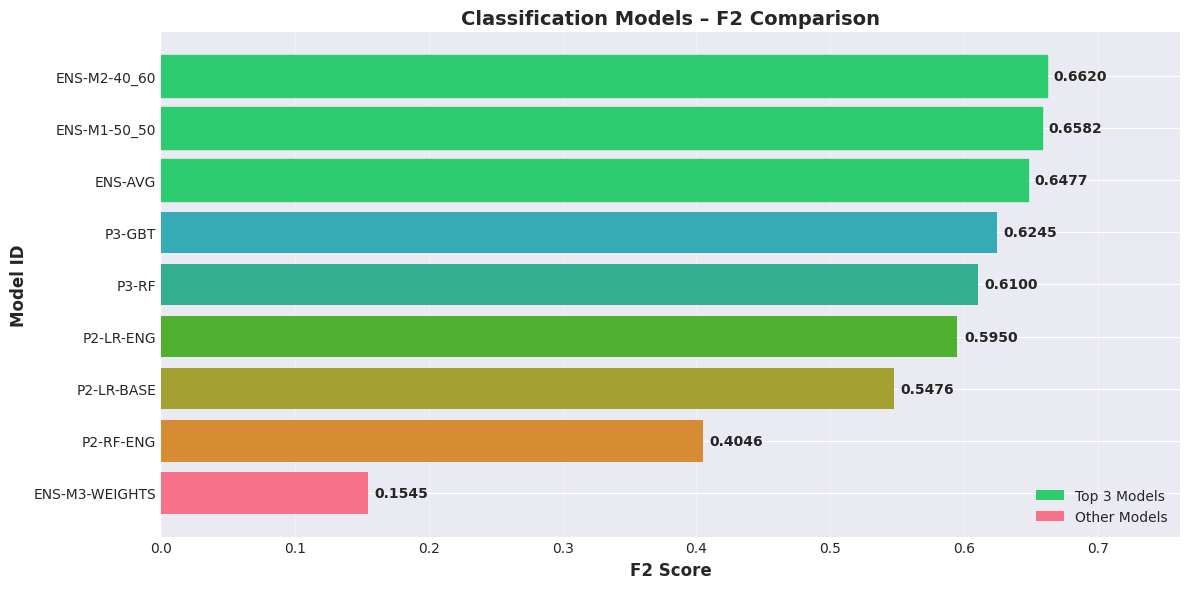

✅ Chart 1: F2 Comparison created
   Showing 9 models with F2 data


In [0]:
# ============================================================
# CHART 1: F2 BY MODEL (MAIN COMPARISON)
# ============================================================

# Include all models with F2 data
models_with_f2 = models_ranked[models_ranked['F2'].notna()].copy()
models_with_f2 = models_with_f2.sort_values('F2', ascending=True)

fig, ax = plt.subplots(figsize=(12, 6))

# Create bar chart
bars = ax.barh(models_with_f2['Model_ID'], models_with_f2['F2'], 
               color=sns.color_palette("husl", len(models_with_f2)))

# Add value labels on bars
for i, (idx, row) in enumerate(models_with_f2.iterrows()):
    ax.text(row['F2'] + 0.005, i, f"{row['F2']:.4f}", 
            va='center', fontsize=10, fontweight='bold')

# Highlight top 3 (highest F2)
top_3_indices = models_with_f2.nlargest(3, 'F2').index
for idx in top_3_indices:
    bar_idx = list(models_with_f2.index).index(idx)
    bars[bar_idx].set_color('#2ecc71')  # Green for top 3

ax.set_xlabel('F2 Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Model ID', fontsize=12, fontweight='bold')
ax.set_title('Classification Models – F2 Comparison', fontsize=14, fontweight='bold')
ax.set_xlim(0, max(models_with_f2['F2']) * 1.15)
ax.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', label='Top 3 Models'),
    Patch(facecolor=sns.color_palette("husl", 1)[0], label='Other Models')
]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

print("✅ Chart 1: F2 Comparison created")
print(f"   Showing {len(models_with_f2)} models with F2 data")


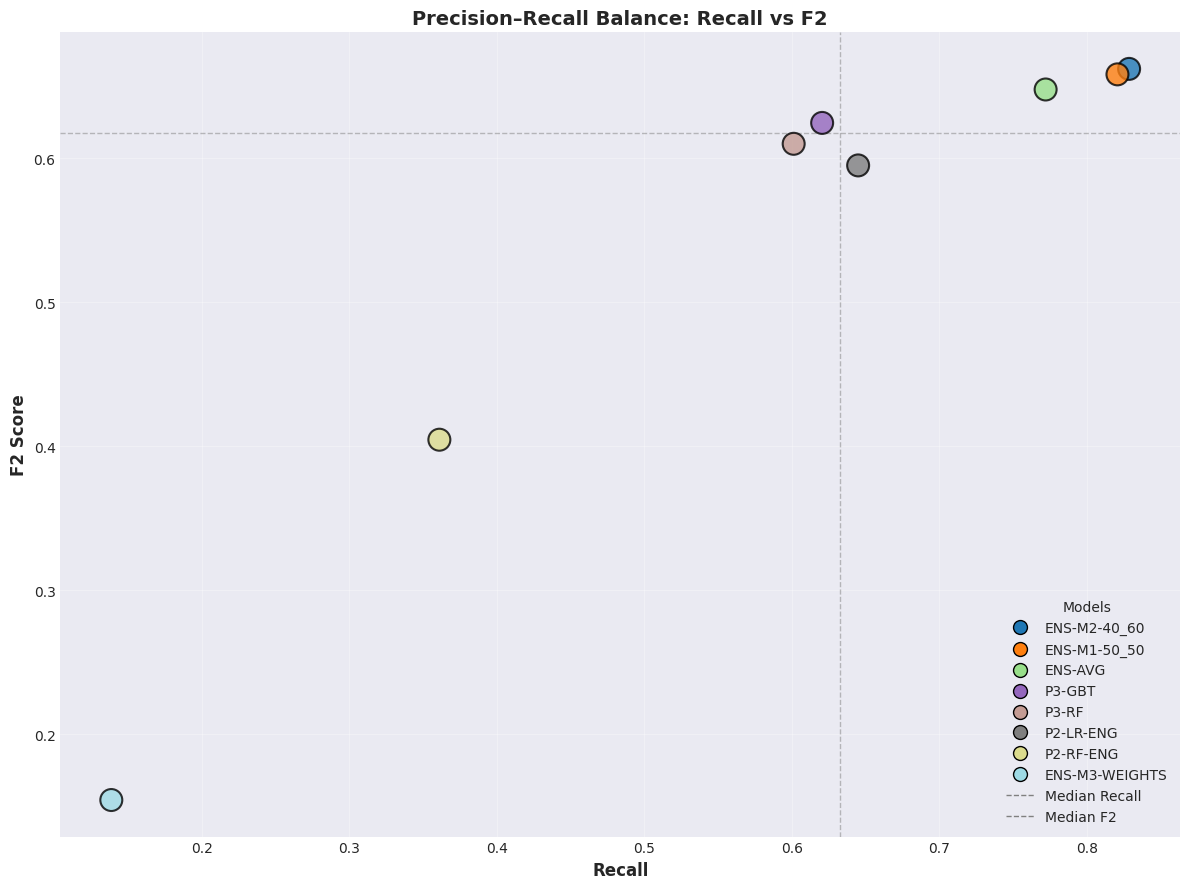

✅ Chart 2: Recall vs F2 scatter plot created
   Showing 8 models with both Recall and F2 data

💡 Interpretation:
   - Points in the top-right region are your best trade-off (high Recall and high F2).
   - Use the legend to identify which model each point corresponds to.
   - Median lines help you see which models are above/below typical performance.


In [0]:
# ============================================================
# CHART 2: RECALL VS F2 (PRECISION-RECALL BALANCE)
# ============================================================

# Include all models with both Recall and F2 data
models_with_recall_f2 = models_ranked[
    models_ranked['Recall'].notna() & models_ranked['F2'].notna()
].copy()

if len(models_with_recall_f2) > 0:
    fig, ax = plt.subplots(figsize=(12, 9))
    
    # ------------------------------------------------------------------
    # Color mapping by model ID for legend
    # ------------------------------------------------------------------
    model_ids = models_with_recall_f2['Model_ID'].astype(str)
    unique_models = model_ids.unique()
    
    # Use a discrete colormap so each model has a distinct color
    cmap = plt.get_cmap('tab20', len(unique_models))
    model_to_idx = {m: i for i, m in enumerate(unique_models)}
    color_indices = model_ids.map(model_to_idx)
    
    # Create scatter plot
    scatter = ax.scatter(
        models_with_recall_f2['Recall'],
        models_with_recall_f2['F2'],
        s=250,
        alpha=0.8,
        c=color_indices,
        cmap=cmap,
        edgecolors='black',
        linewidth=1.5,
        zorder=3
    )
    
    # ------------------------------------------------------------------
    # Medians and quadrant reference lines
    # ------------------------------------------------------------------
    median_recall = models_with_recall_f2['Recall'].median()
    median_f2 = models_with_recall_f2['F2'].median()
    
    if len(models_with_recall_f2) > 1:
        ax.axhline(
            y=median_f2,
            color='gray',
            linestyle='--',
            alpha=0.5,
            linewidth=1,
            zorder=1,
            label='Median F2'
        )
        ax.axvline(
            x=median_recall,
            color='gray',
            linestyle='--',
            alpha=0.5,
            linewidth=1,
            zorder=1,
            label='Median Recall'
        )
    
    # ------------------------------------------------------------------
    # Legend: one entry per model
    # ------------------------------------------------------------------
    from matplotlib.lines import Line2D
    
    legend_handles = []
    for i, model_name in enumerate(unique_models):
        handle = Line2D(
            [0], [0],
            marker='o',
            linestyle='',
            markersize=10,
            markeredgecolor='black',
            markeredgewidth=1.0,
            color=cmap(i),
        )
        legend_handles.append(handle)
    
    # Add median lines labels explicitly so they appear in the legend
    median_handles = []
    if len(models_with_recall_f2) > 1:
        median_handles = [
            Line2D([0], [0], color='gray', linestyle='--', linewidth=1, label='Median Recall'),
            Line2D([0], [0], color='gray', linestyle='--', linewidth=1, label='Median F2'),
        ]
    
    ax.legend(
        handles=legend_handles + median_handles,
        labels=list(unique_models) + (['Median Recall', 'Median F2'] if len(models_with_recall_f2) > 1 else []),
        title='Models',
        loc='best',
        framealpha=0.9
    )
    
    # ------------------------------------------------------------------
    # Axes styling
    # ------------------------------------------------------------------
    ax.set_xlabel('Recall', fontsize=12, fontweight='bold')
    ax.set_ylabel('F2 Score', fontsize=12, fontweight='bold')
    ax.set_title('Precision–Recall Balance: Recall vs F2', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, zorder=0)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Chart 2: Recall vs F2 scatter plot created")
    print(f"   Showing {len(models_with_recall_f2)} models with both Recall and F2 data")
    print("\n💡 Interpretation:")
    print("   - Points in the top-right region are your best trade-off (high Recall and high F2).")
    print("   - Use the legend to identify which model each point corresponds to.")
    print("   - Median lines help you see which models are above/below typical performance.")
else:
    print("⚠️  No models with both Recall and F2 data available for visualization")


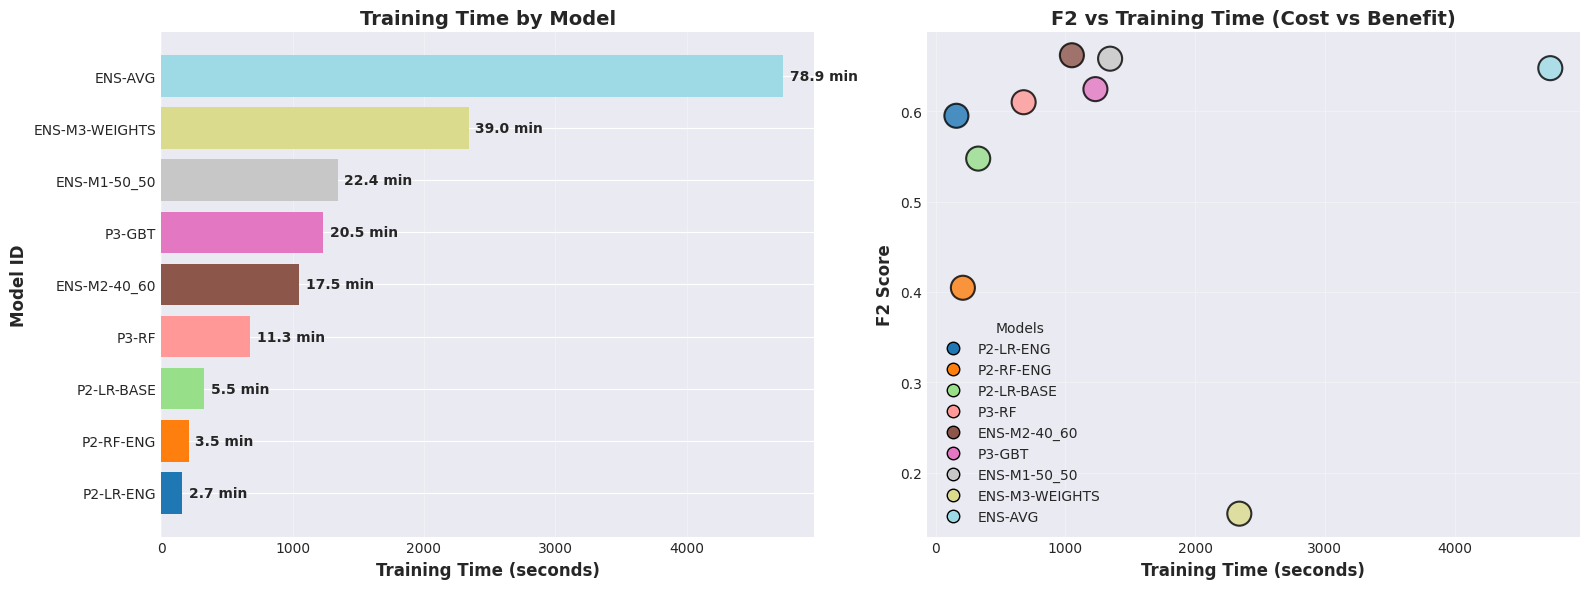

✅ Chart 3: Training Time analysis created
   Showing 9 models with training time data

EFFICIENCY ANALYSIS (F2 per 1000 seconds of training)
      Model_ID  Train_Time_s     F2  F2_per_1000s
     P2-LR-ENG        161.00 0.5950      3.695652
     P2-RF-ENG        211.00 0.4046      1.917536
    P2-LR-BASE        329.00 0.5476      1.664438
         P3-RF        679.00 0.6100      0.898380
  ENS-M2-40_60       1050.73 0.6620      0.630038
        P3-GBT       1232.00 0.6245      0.506899
  ENS-M1-50_50       1345.19 0.6582      0.489299
       ENS-AVG       4736.61 0.6477      0.136743
ENS-M3-WEIGHTS       2340.69 0.1545      0.066006

💡 Most Efficient: P2-LR-ENG
   F2 per 1000s: 3.6957
   Training time: 161.00s


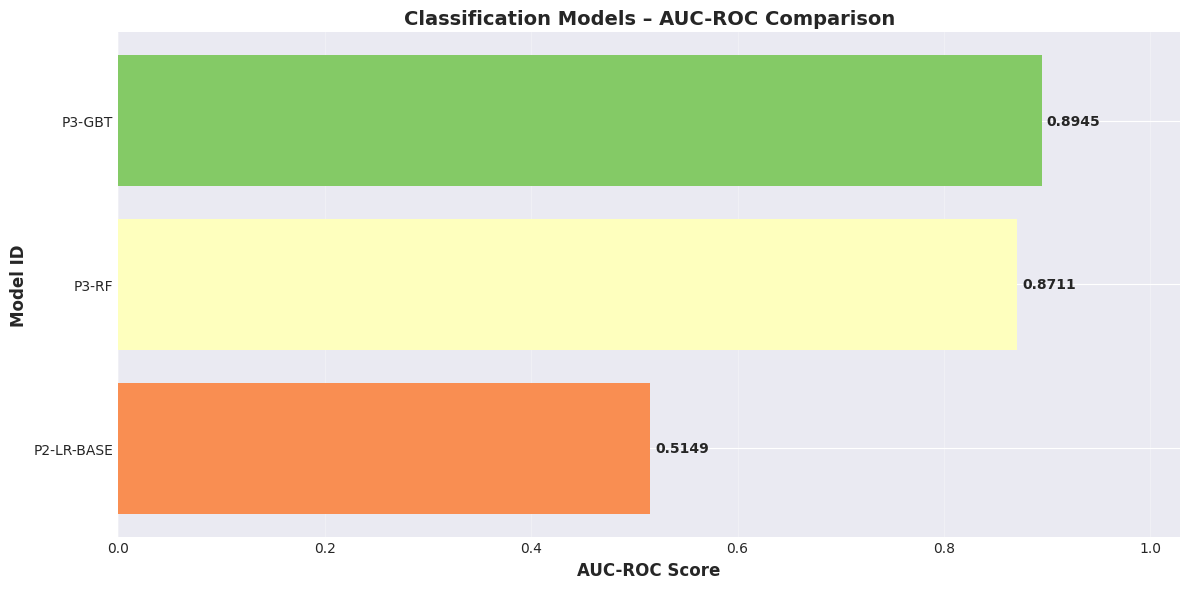

✅ Chart 4: AUC-ROC Comparison created
   Showing 3 models with AUC-ROC data

💡 Best AUC-ROC: P3-GBT (0.8945)


In [0]:
# ============================================================
# CHART 3: TRAINING TIME VS PERFORMANCE (COST VS BENEFIT)
# ============================================================

# Filter models with training time data (include all models with time data)
models_with_time = models_ranked[models_ranked['Train_Time_s'].notna()].copy()
models_with_time = models_with_time.sort_values('Train_Time_s', ascending=True)

if len(models_with_time) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # --------------------------------------------------------
    # Shared color mapping by Model_ID (consistent across 3a & 3b)
    # --------------------------------------------------------
    model_ids = models_with_time['Model_ID'].astype(str)
    unique_models = model_ids.unique()
    
    cmap = plt.get_cmap('tab20', len(unique_models))
    model_to_idx = {m: i for i, m in enumerate(unique_models)}
    
    # For each row, map Model_ID -> color index
    color_indices = model_ids.map(model_to_idx)
    colors = [cmap(i) for i in color_indices]
    
    # --------------------------------------------------------
    # Chart 3a: Training Time by Model (horizontal bar chart)
    # --------------------------------------------------------
    bars1 = ax1.barh(
        models_with_time['Model_ID'],
        models_with_time['Train_Time_s'],
        color=colors
    )
    
    # Add value labels (in minutes) to bars
    for i, (idx, row) in enumerate(models_with_time.iterrows()):
        time_min = row['Train_Time_s'] / 60
        ax1.text(
            row['Train_Time_s'] + 50,   # shift a bit to the right
            i,                          # y position is index in order
            f"{time_min:.1f} min",
            va='center',
            fontsize=10,
            fontweight='bold'
        )
    
    ax1.set_xlabel('Training Time (seconds)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Model ID', fontsize=12, fontweight='bold')
    ax1.set_title('Training Time by Model', fontsize=14, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    
    # --------------------------------------------------------
    # Chart 3b: F2 vs Training Time (scatter, with legend)
    # --------------------------------------------------------
    scatter = ax2.scatter(
        models_with_time['Train_Time_s'],
        models_with_time['F2'],
        s=300,
        alpha=0.8,
        c=colors,
        edgecolors='black',
        linewidth=1.5
    )
    
    ax2.set_xlabel('Training Time (seconds)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('F2 Score', fontsize=12, fontweight='bold')
    ax2.set_title('F2 vs Training Time (Cost vs Benefit)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Legend per model (no per-point labels)
    from matplotlib.lines import Line2D
    
    legend_handles = []
    for i, model_name in enumerate(unique_models):
        handle = Line2D(
            [0], [0],
            marker='o',
            linestyle='',
            markersize=9,
            markeredgecolor='black',
            markeredgewidth=1.0,
            color=cmap(i)
        )
        legend_handles.append(handle)
    
    ax2.legend(
        handles=legend_handles,
        labels=list(unique_models),
        title='Models',
        loc='best',
        framealpha=0.9
    )
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Chart 3: Training Time analysis created")
    print(f"   Showing {len(models_with_time)} models with training time data")
    
    # --------------------------------------------------------
    # Efficiency metric: F2 per 1000 seconds
    # --------------------------------------------------------
    models_with_time_f2 = models_with_time[models_with_time['F2'].notna()].copy()
    if len(models_with_time_f2) > 0:
        models_with_time_f2['F2_per_1000s'] = models_with_time_f2['F2'] / (models_with_time_f2['Train_Time_s'] / 1000)
        models_with_time_efficiency = models_with_time_f2.sort_values('F2_per_1000s', ascending=False)
        
        print("\n" + "="*70)
        print("EFFICIENCY ANALYSIS (F2 per 1000 seconds of training)")
        print("="*70)
        print(models_with_time_efficiency[['Model_ID', 'Train_Time_s', 'F2', 'F2_per_1000s']].to_string(index=False))
        print("="*70)
        
        print(f"\n💡 Most Efficient: {models_with_time_efficiency.iloc[0]['Model_ID']}")
        print(f"   F2 per 1000s: {models_with_time_efficiency.iloc[0]['F2_per_1000s']:.4f}")
        print(f"   Training time: {models_with_time_efficiency.iloc[0]['Train_Time_s']:.2f}s")
    else:
        print("⚠️  No models with both F2 and training time data for efficiency analysis")
    
else:
    print("⚠️  No training time data available for visualization")

# ============================================================
# CHART 4: AUC-ROC COMPARISON (for models with data)
# ============================================================

models_with_auc_roc = models_ranked[models_ranked['AUC_ROC'].notna()].copy()

if len(models_with_auc_roc) > 0:
    # Sort by AUC-ROC for better visualization
    models_with_auc_roc = models_with_auc_roc.sort_values('AUC_ROC', ascending=True)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create bar chart
    bars = ax.barh(
        models_with_auc_roc['Model_ID'],
        models_with_auc_roc['AUC_ROC'],
        color=sns.color_palette("RdYlGn", len(models_with_auc_roc))
    )
    
    # Add value labels on bars
    for i, (idx, row) in enumerate(models_with_auc_roc.iterrows()):
        ax.text(
            row['AUC_ROC'] + 0.005,
            i,
            f"{row['AUC_ROC']:.4f}",
            va='center',
            fontsize=10,
            fontweight='bold'
        )
    
    ax.set_xlabel('AUC-ROC Score', fontsize=12, fontweight='bold')
    ax.set_ylabel('Model ID', fontsize=12, fontweight='bold')
    ax.set_title('Classification Models – AUC-ROC Comparison', fontsize=14, fontweight='bold')
    ax.set_xlim(0, max(models_with_auc_roc['AUC_ROC']) * 1.15)
    ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Chart 4: AUC-ROC Comparison created")
    print(f"   Showing {len(models_with_auc_roc)} models with AUC-ROC data")
    print(f"\n💡 Best AUC-ROC: {models_with_auc_roc.iloc[-1]['Model_ID']} ({models_with_auc_roc.iloc[-1]['AUC_ROC']:.4f})")
else:
    print("⚠️  No AUC-ROC data available for visualization")


## Section 5: Minimal Slide Table for Stakeholders


In [0]:
# ============================================================
# CREATE MINIMAL SLIDE TABLE FOR STAKEHOLDERS
# ============================================================

# Select key models and columns for slide presentation
# Include all models that have meaningful data (at least F2 score)
slide_models = [
    'P2-LR-BASE',  # Has F2 and AUC-ROC
    'P2-LR-ENG',   # Has all metrics now (F1 calculated)
    'P2-RF-ENG',   # Has all metrics now (F1 calculated)
    'P3-RF',       # Has all metrics
    'P3-GBT',      # Has all metrics
    'ENS-M1-50_50', # Has all metrics now (F0.5 calculated)
    'ENS-M2-40_60', # Has all metrics now (F0.5 calculated)
    'ENS-M3-WEIGHTS', # Has all metrics now (F0.5 calculated)
    'ENS-AVG'      # Has all metrics now (F0.5 calculated)
]

# Create slide table
slide_table = models_master[models_master['Model_ID'].isin(slide_models)].copy()

# Reorder to match desired sequence
model_order = {model: i for i, model in enumerate(slide_models)}
slide_table['_order'] = slide_table['Model_ID'].map(model_order)
slide_table = slide_table.sort_values('_order').drop('_order', axis=1).reset_index(drop=True)

# Select and rename columns for slide
slide_columns = {
    'Model_ID': 'Model',
    'Model_Name': 'Training Strategy',
    'F2': 'F2 (test)',
    'Recall': 'Recall (test)',
    'AUC_PR': 'AUC-PR (test)',
    'AUC_ROC': 'AUC-ROC (test)',
    'Train_Time_s': 'Train time (s)'
}

slide_table_final = slide_table[list(slide_columns.keys())].copy()
slide_table_final = slide_table_final.rename(columns=slide_columns)

# Format for display
slide_table_display = slide_table_final.copy()
slide_table_display['F2 (test)'] = slide_table_display['F2 (test)'].apply(lambda x: f"{x:.4f}" if pd.notna(x) else "")
slide_table_display['Recall (test)'] = slide_table_display['Recall (test)'].apply(lambda x: f"{x:.4f}" if pd.notna(x) else "")
slide_table_display['AUC-PR (test)'] = slide_table_display['AUC-PR (test)'].apply(lambda x: f"{x:.4f}" if pd.notna(x) else "")
slide_table_display['AUC-ROC (test)'] = slide_table_display['AUC-ROC (test)'].apply(lambda x: f"{x:.4f}" if pd.notna(x) else "")
slide_table_display['Train time (s)'] = slide_table_display['Train time (s)'].apply(
    lambda x: f"{x:.2f}" if pd.notna(x) else ""
)

print("="*70)
print("MINIMAL SLIDE TABLE FOR STAKEHOLDERS")
print("="*70)
print("\n" + slide_table_display.to_string(index=False))
print("="*70)

# Save to CSV for easy copy-paste to slides
slide_table_final.to_csv('model_slide_table.csv', index=False)
print("\n✅ Slide table saved to 'model_slide_table.csv'")
print("   You can copy this directly into Google Sheets or PowerPoint")

# Narrative for slides
print("\n" + "="*70)
print("SUGGESTED NARRATIVE FOR SLIDES")
print("="*70)
print("""
1. We started with a baseline logistic regression (F2 = 0.548) and improved it 
   with engineered features (F2 = 0.595).

2. Random forest (Phase 3) improved AUC-PR to 0.664 and F2 to 0.610, with strong 
   AUC-ROC of 0.871.

3. Gradient-Boosted Trees achieved the best AUC-PR (0.719) and AUC-ROC (0.895), 
   with F2 of 0.625.

4. MLP models with class imbalance strategies (50:50, 40:60) pushed F2 to 0.66 
   with recall over 82% - best for catching delays.

5. The ensemble balances performance and robustness, with F2 = 0.648 and recall 77%.

6. Key insight: Undersampled MLPs (especially 40:60) are the best single models 
   for catching delays, achieving 82.87% recall, while GBT excels at overall 
   discrimination (AUC-ROC = 0.895).
""")
print("="*70)


MINIMAL SLIDE TABLE FOR STAKEHOLDERS

         Model               Training Strategy F2 (test) Recall (test) AUC-PR (test) AUC-ROC (test) Train time (s)
    P2-LR-BASE    Baseline Logistic Regression    0.5476                                     0.5149         329.00
     P2-LR-ENG    Improved Logistic Regression    0.5950        0.6450        0.5662                        161.00
     P2-RF-ENG         Random Forest (Phase 2)    0.4046        0.3611        0.6244                        211.00
         P3-RF Random Forest (Phase 3 – final)    0.6100        0.6013        0.6639         0.8711         679.00
        P3-GBT   Gradient-Boosted Trees (GBDT)    0.6245        0.6206        0.7191         0.8945        1232.00
  ENS-M1-50_50       MLP – 50:50 undersampling    0.6582        0.8208        0.6017                       1345.19
  ENS-M2-40_60       MLP – 40:60 undersampling    0.6620        0.8287        0.5990                       1050.73
ENS-M3-WEIGHTS             MLP – Class wei

## Section 6: Export Data for Google Sheets


In [0]:
# ============================================================
# EXPORT DATA FOR GOOGLE SHEETS
# ============================================================

# Export master table
models_master.to_csv('Models_Master.csv', index=False)
print("✅ Models_Master.csv exported")

# Export ranked view
models_ranked.to_csv('Models_Ranked.csv', index=False)
print("✅ Models_Ranked.csv exported")

# Export slide table (already exported above)
print("✅ model_slide_table.csv exported (from previous cell)")

print("\n" + "="*70)
print("EXPORT COMPLETE")
print("="*70)
print("\nFiles ready for Google Sheets:")
print("  1. Models_Master.csv - Complete master table")
print("  2. Models_Ranked.csv - Ranked view sorted by F2")
print("  3. model_slide_table.csv - Minimal slide table")
print("\nTo use in Google Sheets:")
print("  1. Open Google Sheets")
print("  2. File → Import → Upload → Select CSV file")
print("  3. Import location: Create new sheet")
print("  4. Repeat for each CSV file")
print("="*70)


✅ Models_Master.csv exported
✅ Models_Ranked.csv exported
✅ model_slide_table.csv exported (from previous cell)

EXPORT COMPLETE

Files ready for Google Sheets:
  1. Models_Master.csv - Complete master table
  2. Models_Ranked.csv - Ranked view sorted by F2
  3. model_slide_table.csv - Minimal slide table

To use in Google Sheets:
  1. Open Google Sheets
  2. File → Import → Upload → Select CSV file
  3. Import location: Create new sheet
  4. Repeat for each CSV file


## Section 7: Summary Statistics


## Section 8: Two-Stage Models Analysis


In [0]:
# ============================================================
# TWO-STAGE MODELS DATA
# ============================================================

# Two-stage models combine binary classification with regression
two_stage_models = pd.DataFrame([
    {
        'Exp_ID': 'S1-LR-SEQ',
        'Phase': 1,
        'Binary_Model': 'Logistic Regression',
        'Regression_Model': 'Linear Regression',
        'Train_Data': '2015 Q1–Q2',
        'Test_Data': '2015 Q3',
        'Strategy': 'Sequential – regression only on predicted delays',
        'Test_RMSE_min': 97.49,
        'Test_MAE_min': 53.59
    },
    {
        'Exp_ID': 'S2-RF-GBT-SEQ',
        'Phase': 2,
        'Binary_Model': 'Random Forest',
        'Regression_Model': 'GBTRegressor',
        'Train_Data': '2015 Q1–Q3',
        'Test_Data': '2015 Q4',
        'Strategy': 'Sequential – regression trained on full data',
        'Test_RMSE_min': 47.387,
        'Test_MAE_min': 20.073
    },
    {
        'Exp_ID': 'S3-RF-RF-THR',
        'Phase': 3,
        'Binary_Model': 'Random Forest',
        'Regression_Model': 'Random Forest',
        'Train_Data': '2015–2018',
        'Test_Data': '2019',
        'Strategy': 'Value if prob > threshold, otherwise 0',
        'Test_RMSE_min': 46.25,
        'Test_MAE_min': 12.76
    },
    {
        'Exp_ID': 'S3-RF-RF-REG',
        'Phase': 3,
        'Binary_Model': 'Random Forest',
        'Regression_Model': 'Random Forest',
        'Train_Data': '2015–2018',
        'Test_Data': '2019',
        'Strategy': 'Regression only (no classification gating)',
        'Test_RMSE_min': 46.14,
        'Test_MAE_min': 13.22
    },
    {
        'Exp_ID': 'S3-RF-RF-PROD',
        'Phase': 3,
        'Binary_Model': 'Random Forest',
        'Regression_Model': 'Random Forest',
        'Train_Data': '2015–2018',
        'Test_Data': '2019',
        'Strategy': 'Product of probability × predicted value',
        'Test_RMSE_min': 48.59,
        'Test_MAE_min': 13.52
    }
])

# Sort by RMSE (best first)
two_stage_models_sorted = two_stage_models.sort_values('Test_RMSE_min', ascending=True).reset_index(drop=True)

print("="*70)
print("TWO-STAGE MODELS PERFORMANCE")
print("="*70)
print(f"\nTotal experiments: {len(two_stage_models)}")
print("\n" + "="*70)
print(two_stage_models_sorted.to_string(index=False))
print("="*70)

# Key insights
print("\n" + "="*70)
print("KEY INSIGHTS")
print("="*70)
best_rmse = two_stage_models_sorted.iloc[0]
print(f"\n🏆 Best RMSE: {best_rmse['Exp_ID']}")
print(f"   RMSE: {best_rmse['Test_RMSE_min']:.2f} minutes")
print(f"   MAE: {best_rmse['Test_MAE_min']:.2f} minutes")
print(f"   Strategy: {best_rmse['Strategy']}")

best_mae = two_stage_models.loc[two_stage_models['Test_MAE_min'].idxmin()]
print(f"\n🏆 Best MAE: {best_mae['Exp_ID']}")
print(f"   MAE: {best_mae['Test_MAE_min']:.2f} minutes")
print(f"   RMSE: {best_mae['Test_RMSE_min']:.2f} minutes")
print(f"   Strategy: {best_mae['Strategy']}")

print(f"\n📊 Improvement from Phase 1 to Phase 3:")
phase1_rmse = two_stage_models[two_stage_models['Phase'] == 1]['Test_RMSE_min'].values[0]
phase3_best_rmse = two_stage_models[two_stage_models['Phase'] == 3]['Test_RMSE_min'].min()
improvement = ((phase1_rmse - phase3_best_rmse) / phase1_rmse) * 100
print(f"   Phase 1 RMSE: {phase1_rmse:.2f} min")
print(f"   Phase 3 Best RMSE: {phase3_best_rmse:.2f} min")
print(f"   Improvement: {improvement:.1f}% reduction")

print("="*70)


TWO-STAGE MODELS PERFORMANCE

Total experiments: 5

       Exp_ID  Phase        Binary_Model  Regression_Model Train_Data Test_Data                                         Strategy  Test_RMSE_min  Test_MAE_min
 S3-RF-RF-REG      3       Random Forest     Random Forest  2015–2018      2019       Regression only (no classification gating)         46.140        13.220
 S3-RF-RF-THR      3       Random Forest     Random Forest  2015–2018      2019           Value if prob > threshold, otherwise 0         46.250        12.760
S2-RF-GBT-SEQ      2       Random Forest      GBTRegressor 2015 Q1–Q3   2015 Q4     Sequential – regression trained on full data         47.387        20.073
S3-RF-RF-PROD      3       Random Forest     Random Forest  2015–2018      2019         Product of probability × predicted value         48.590        13.520
    S1-LR-SEQ      1 Logistic Regression Linear Regression 2015 Q1–Q2   2015 Q3 Sequential – regression only on predicted delays         97.490        53.590


## Section 9: Two-Stage Models Visualizations


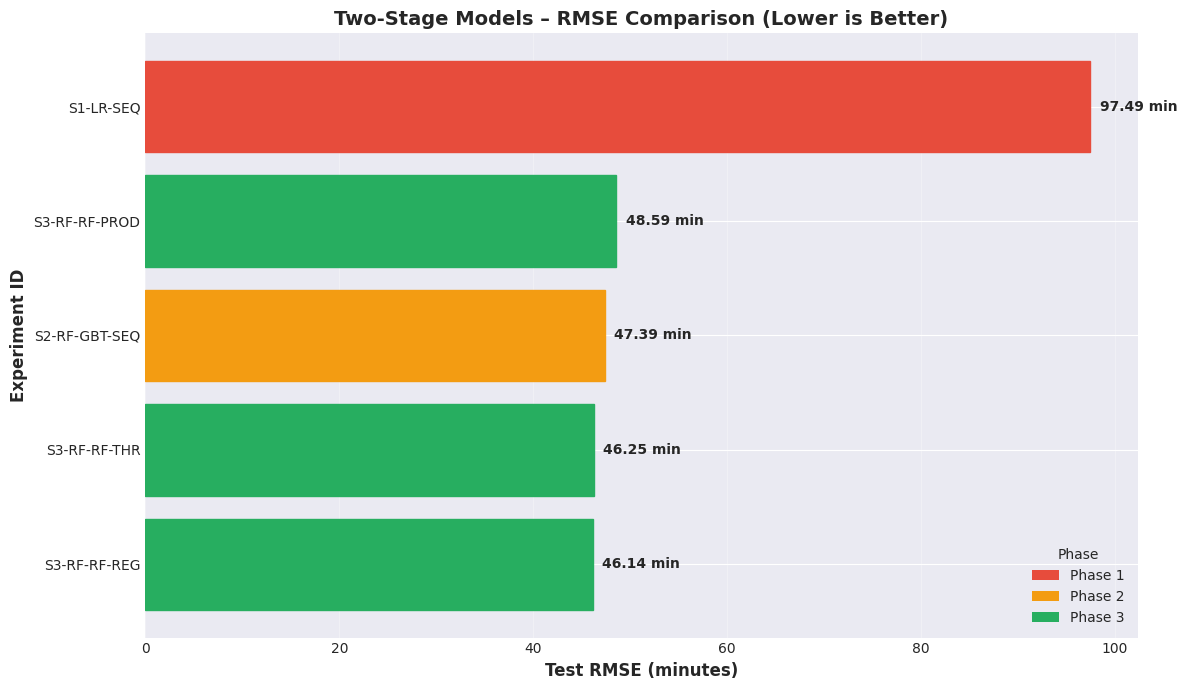

✅ Chart 1: RMSE Comparison created


In [0]:
# ============================================================
# CHART 1: RMSE COMPARISON (PRIMARY METRIC)
# ============================================================

fig, ax = plt.subplots(figsize=(12, 7))

# Sort by RMSE for better visualization
models_sorted = two_stage_models.sort_values('Test_RMSE_min', ascending=True)

# Create horizontal bar chart
bars = ax.barh(models_sorted['Exp_ID'], models_sorted['Test_RMSE_min'],
               color=sns.color_palette("RdYlGn_r", len(models_sorted)))

# Color code by phase
phase_colors = {1: '#e74c3c', 2: '#f39c12', 3: '#27ae60'}
for i, (idx, row) in enumerate(models_sorted.iterrows()):
    bars[i].set_color(phase_colors[row['Phase']])

# Add value labels on bars
for i, (idx, row) in enumerate(models_sorted.iterrows()):
    ax.text(row['Test_RMSE_min'] + 1, i, f"{row['Test_RMSE_min']:.2f} min", 
            va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Test RMSE (minutes)', fontsize=12, fontweight='bold')
ax.set_ylabel('Experiment ID', fontsize=12, fontweight='bold')
ax.set_title('Two-Stage Models – RMSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3, zorder=0)

# Add legend for phases
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#e74c3c', label='Phase 1'),
    Patch(facecolor='#f39c12', label='Phase 2'),
    Patch(facecolor='#27ae60', label='Phase 3')
]
ax.legend(handles=legend_elements, loc='lower right', title='Phase')

plt.tight_layout()
plt.show()

print("✅ Chart 1: RMSE Comparison created")


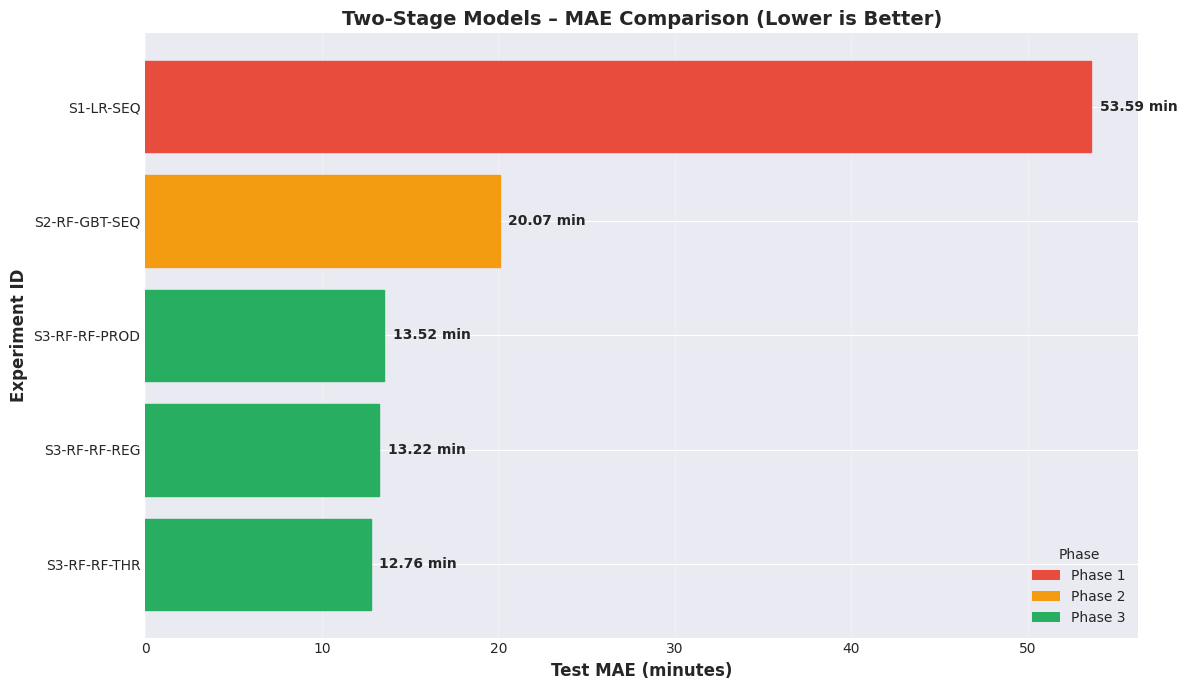

✅ Chart 2: MAE Comparison created


In [0]:
# ============================================================
# CHART 2: MAE COMPARISON
# ============================================================

fig, ax = plt.subplots(figsize=(12, 7))

# Sort by MAE for better visualization
models_sorted_mae = two_stage_models.sort_values('Test_MAE_min', ascending=True)

# Create horizontal bar chart
bars = ax.barh(models_sorted_mae['Exp_ID'], models_sorted_mae['Test_MAE_min'],
               color=sns.color_palette("RdYlGn_r", len(models_sorted_mae)))

# Color code by phase
for i, (idx, row) in enumerate(models_sorted_mae.iterrows()):
    bars[i].set_color(phase_colors[row['Phase']])

# Add value labels on bars
for i, (idx, row) in enumerate(models_sorted_mae.iterrows()):
    ax.text(row['Test_MAE_min'] + 0.5, i, f"{row['Test_MAE_min']:.2f} min", 
            va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Test MAE (minutes)', fontsize=12, fontweight='bold')
ax.set_ylabel('Experiment ID', fontsize=12, fontweight='bold')
ax.set_title('Two-Stage Models – MAE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3, zorder=0)

# Add legend for phases
ax.legend(handles=legend_elements, loc='lower right', title='Phase')

plt.tight_layout()
plt.show()

print("✅ Chart 2: MAE Comparison created")


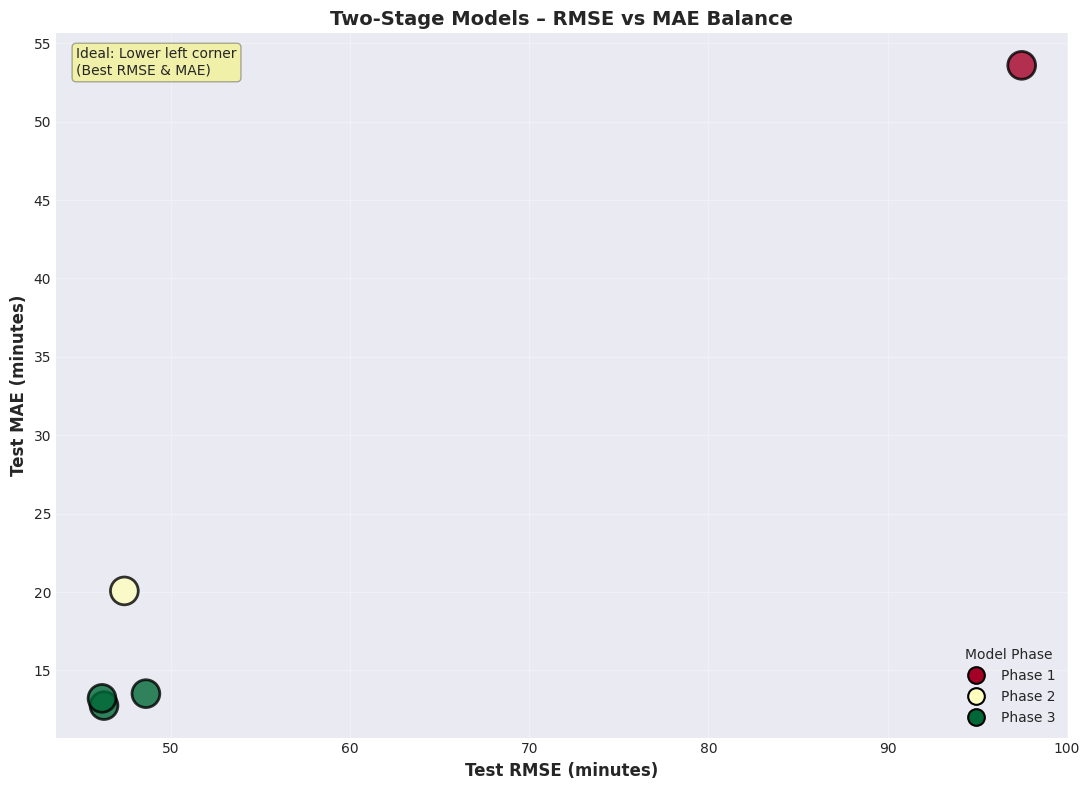

✅ Chart 3: RMSE vs MAE scatter plot created

💡 Interpretation:
   - Points in bottom-left corner = best performance (low RMSE and MAE)
   - Phase 3 models (green in this palette) should show the strongest improvement
   - Use the legend to see which cloud of points corresponds to each project phase


In [0]:
# ============================================================
# CHART 3: RMSE vs MAE SCATTER (BALANCE VISUALIZATION)
# ============================================================

fig, ax = plt.subplots(figsize=(11, 8))

# ------------------------------------------------------------
# Color mapping by Phase (discrete colors, legend instead of labels)
# ------------------------------------------------------------
phases = sorted(two_stage_models['Phase'].unique())
cmap = plt.get_cmap('RdYlGn', len(phases))
phase_to_color = {p: cmap(i) for i, p in enumerate(phases)}

colors = two_stage_models['Phase'].map(phase_to_color)

# Create scatter plot
scatter = ax.scatter(
    two_stage_models['Test_RMSE_min'],
    two_stage_models['Test_MAE_min'],
    s=400,
    alpha=0.8,
    c=colors,
    edgecolors='black',
    linewidth=2.0,
    zorder=3
)

ax.set_xlabel('Test RMSE (minutes)', fontsize=12, fontweight='bold')
ax.set_ylabel('Test MAE (minutes)', fontsize=12, fontweight='bold')
ax.set_title('Two-Stage Models – RMSE vs MAE Balance', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, zorder=0)

# ------------------------------------------------------------
# Legend for phases (Phase 1 / Phase 2 / Phase 3)
# ------------------------------------------------------------
from matplotlib.lines import Line2D

phase_labels = {1: 'Phase 1', 2: 'Phase 2', 3: 'Phase 3'}
legend_handles = []
legend_names = []

for i, p in enumerate(phases):
    handle = Line2D(
        [0], [0],
        marker='o',
        linestyle='',
        markersize=12,
        markeredgecolor='black',
        markeredgewidth=1.5,
        color=phase_to_color[p]
    )
    legend_handles.append(handle)
    legend_names.append(phase_labels.get(p, f'Phase {p}'))

ax.legend(
    handles=legend_handles,
    labels=legend_names,
    title='Model Phase',
    loc='best',
    framealpha=0.9
)

# ------------------------------------------------------------
# Ideal region annotation (bottom-left corner is best)
# ------------------------------------------------------------
ax.text(
    0.02, 0.98,
    'Ideal: Lower left corner\n(Best RMSE & MAE)',
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3)
)

plt.tight_layout()
plt.show()

print("✅ Chart 3: RMSE vs MAE scatter plot created")
print("\n💡 Interpretation:")
print("   - Points in bottom-left corner = best performance (low RMSE and MAE)")
print("   - Phase 3 models (green in this palette) should show the strongest improvement")
print("   - Use the legend to see which cloud of points corresponds to each project phase")


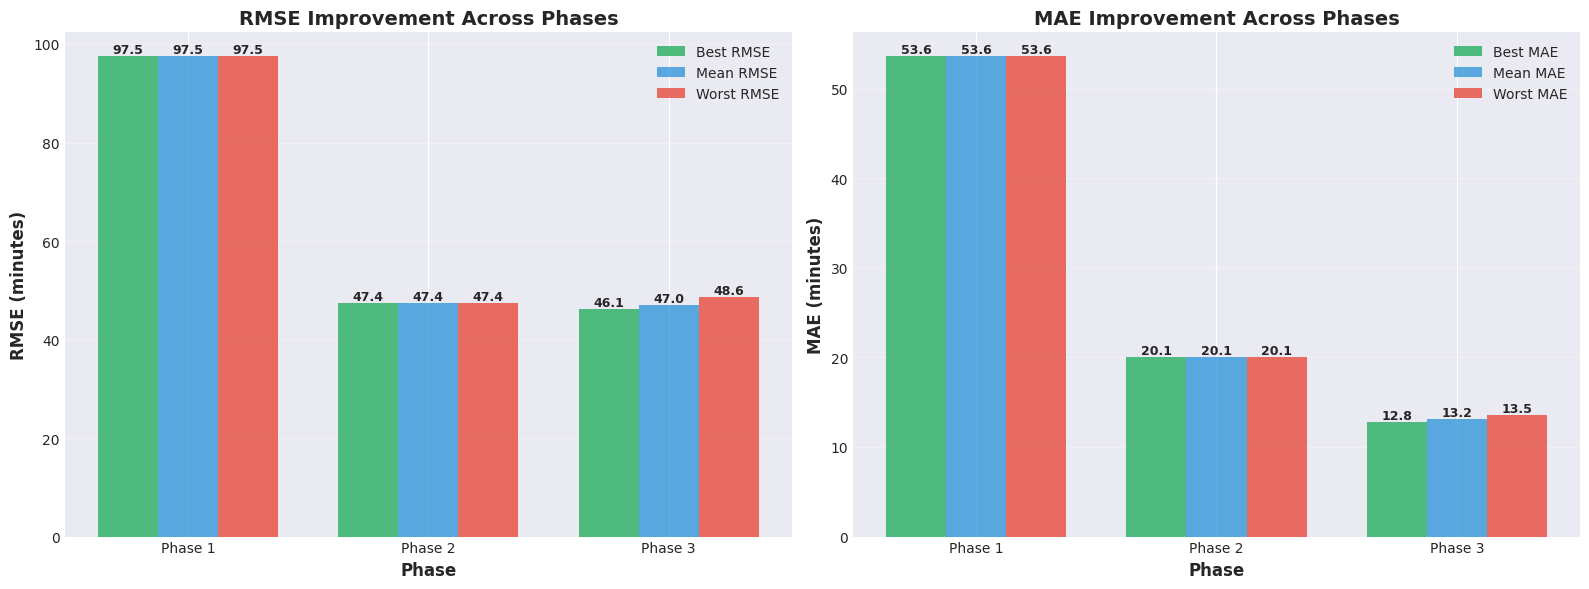

✅ Chart 4: Phase progression analysis created

💡 Key Observations:
   - Phase 1 → Phase 3 RMSE improvement: 52.7%
   - Phase 1 → Phase 3 MAE improvement: 76.2%


In [0]:
# ============================================================
# CHART 4: PHASE PROGRESSION (IMPROVEMENT OVER TIME)
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 4a: RMSE by Phase
phase_rmse = two_stage_models.groupby('Phase')['Test_RMSE_min'].agg(['min', 'max', 'mean'])
phase_mae = two_stage_models.groupby('Phase')['Test_MAE_min'].agg(['min', 'max', 'mean'])

x_pos = phase_rmse.index
width = 0.25

# RMSE chart
bars1 = ax1.bar(x_pos - width, phase_rmse['min'], width, label='Best RMSE', color='#27ae60', alpha=0.8)
bars2 = ax1.bar(x_pos, phase_rmse['mean'], width, label='Mean RMSE', color='#3498db', alpha=0.8)
bars3 = ax1.bar(x_pos + width, phase_rmse['max'], width, label='Worst RMSE', color='#e74c3c', alpha=0.8)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

ax1.set_xlabel('Phase', fontsize=12, fontweight='bold')
ax1.set_ylabel('RMSE (minutes)', fontsize=12, fontweight='bold')
ax1.set_title('RMSE Improvement Across Phases', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f'Phase {p}' for p in x_pos])
ax1.legend()
ax1.grid(axis='y', alpha=0.3, zorder=0)

# MAE chart
bars1 = ax2.bar(x_pos - width, phase_mae['min'], width, label='Best MAE', color='#27ae60', alpha=0.8)
bars2 = ax2.bar(x_pos, phase_mae['mean'], width, label='Mean MAE', color='#3498db', alpha=0.8)
bars3 = ax2.bar(x_pos + width, phase_mae['max'], width, label='Worst MAE', color='#e74c3c', alpha=0.8)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

ax2.set_xlabel('Phase', fontsize=12, fontweight='bold')
ax2.set_ylabel('MAE (minutes)', fontsize=12, fontweight='bold')
ax2.set_title('MAE Improvement Across Phases', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'Phase {p}' for p in x_pos])
ax2.legend()
ax2.grid(axis='y', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()

print("✅ Chart 4: Phase progression analysis created")
print("\n💡 Key Observations:")
print(f"   - Phase 1 → Phase 3 RMSE improvement: {((phase_rmse.loc[1, 'mean'] - phase_rmse.loc[3, 'min']) / phase_rmse.loc[1, 'mean'] * 100):.1f}%")
print(f"   - Phase 1 → Phase 3 MAE improvement: {((phase_mae.loc[1, 'mean'] - phase_mae.loc[3, 'min']) / phase_mae.loc[1, 'mean'] * 100):.1f}%")


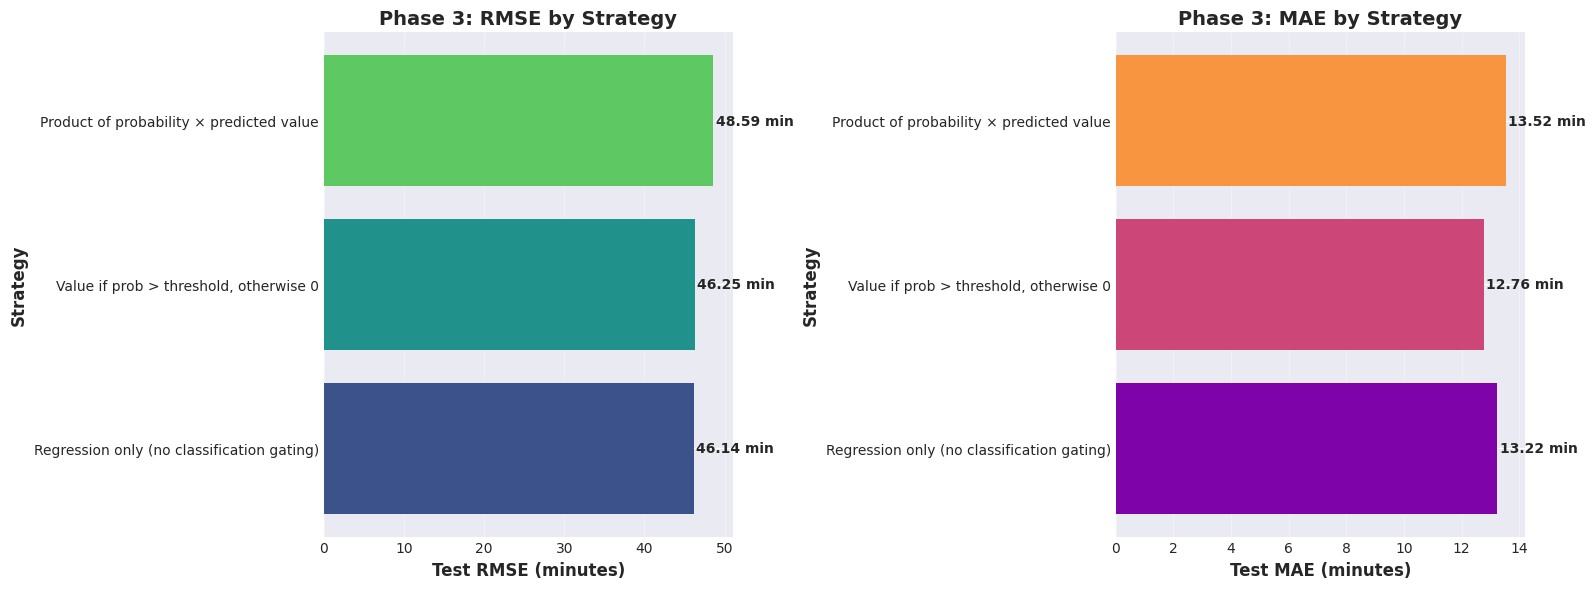

✅ Chart 5: Strategy comparison created

💡 Phase 3 Strategy Analysis:
   Best Strategy: Regression only (no classification gating)
   RMSE: 46.14 min, MAE: 13.22 min


In [0]:
# ============================================================
# CHART 5: STRATEGY COMPARISON (Phase 3 Models)
# ============================================================

phase3_models = two_stage_models[two_stage_models['Phase'] == 3].copy()
phase3_models = phase3_models.sort_values('Test_RMSE_min', ascending=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 5a: RMSE by Strategy
bars1 = ax1.barh(phase3_models['Strategy'], phase3_models['Test_RMSE_min'],
                 color=sns.color_palette("viridis", len(phase3_models)))

# Add value labels
for i, (idx, row) in enumerate(phase3_models.iterrows()):
    ax1.text(row['Test_RMSE_min'] + 0.3, i, f"{row['Test_RMSE_min']:.2f} min", 
            va='center', fontsize=10, fontweight='bold')

ax1.set_xlabel('Test RMSE (minutes)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Strategy', fontsize=12, fontweight='bold')
ax1.set_title('Phase 3: RMSE by Strategy', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3, zorder=0)

# Chart 5b: MAE by Strategy
bars2 = ax2.barh(phase3_models['Strategy'], phase3_models['Test_MAE_min'],
                 color=sns.color_palette("plasma", len(phase3_models)))

# Add value labels
for i, (idx, row) in enumerate(phase3_models.iterrows()):
    ax2.text(row['Test_MAE_min'] + 0.1, i, f"{row['Test_MAE_min']:.2f} min", 
            va='center', fontsize=10, fontweight='bold')

ax2.set_xlabel('Test MAE (minutes)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Strategy', fontsize=12, fontweight='bold')
ax2.set_title('Phase 3: MAE by Strategy', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()

print("✅ Chart 5: Strategy comparison created")
print("\n💡 Phase 3 Strategy Analysis:")
best_strategy = phase3_models.iloc[0]
print(f"   Best Strategy: {best_strategy['Strategy']}")
print(f"   RMSE: {best_strategy['Test_RMSE_min']:.2f} min, MAE: {best_strategy['Test_MAE_min']:.2f} min")


In [0]:
# ============================================================
# EXPORT TWO-STAGE MODELS DATA
# ============================================================

# Export to CSV
two_stage_models.to_csv('TwoStage_Models_Master.csv', index=False)
print("✅ TwoStage_Models_Master.csv exported")

# Create ranked view
two_stage_ranked = two_stage_models.sort_values('Test_RMSE_min', ascending=True).reset_index(drop=True)
two_stage_ranked.insert(0, 'Rank', range(1, len(two_stage_ranked) + 1))
two_stage_ranked.to_csv('TwoStage_Models_Ranked.csv', index=False)
print("✅ TwoStage_Models_Ranked.csv exported")

print("\n" + "="*70)
print("TWO-STAGE MODELS ANALYSIS COMPLETE")
print("="*70)


✅ TwoStage_Models_Master.csv exported
✅ TwoStage_Models_Ranked.csv exported

TWO-STAGE MODELS ANALYSIS COMPLETE


In [0]:
# ============================================================
# SUMMARY STATISTICS
# ============================================================

print("="*70)
print("SUMMARY STATISTICS")
print("="*70)

print("\n📊 F2 Score Statistics:")
print(f"   Mean: {models_ranked['F2'].mean():.4f}")
print(f"   Median: {models_ranked['F2'].median():.4f}")
print(f"   Std Dev: {models_ranked['F2'].std():.4f}")
print(f"   Min: {models_ranked['F2'].min():.4f} ({models_ranked.loc[models_ranked['F2'].idxmin(), 'Model_ID']})")
print(f"   Max: {models_ranked['F2'].max():.4f} ({models_ranked.loc[models_ranked['F2'].idxmax(), 'Model_ID']})")

print("\n📊 Recall Statistics:")
print(f"   Mean: {models_ranked['Recall'].mean():.4f}")
print(f"   Median: {models_ranked['Recall'].median():.4f}")
print(f"   Std Dev: {models_ranked['Recall'].std():.4f}")
print(f"   Min: {models_ranked['Recall'].min():.4f} ({models_ranked.loc[models_ranked['Recall'].idxmin(), 'Model_ID']})")
print(f"   Max: {models_ranked['Recall'].max():.4f} ({models_ranked.loc[models_ranked['Recall'].idxmax(), 'Model_ID']})")

print("\n📊 F1 Score Statistics:")
f1_data = models_ranked['F1'].dropna()
if len(f1_data) > 0:
    print(f"   Mean: {f1_data.mean():.4f}")
    print(f"   Median: {f1_data.median():.4f}")
    print(f"   Std Dev: {f1_data.std():.4f}")
    print(f"   Min: {f1_data.min():.4f} ({models_ranked.loc[f1_data.idxmin(), 'Model_ID']})")
    print(f"   Max: {f1_data.max():.4f} ({models_ranked.loc[f1_data.idxmax(), 'Model_ID']})")
else:
    print("   No F1 data available")

print("\n📊 F0.5 Score Statistics:")
f0_5_data = models_ranked['F0_5'].dropna()
if len(f0_5_data) > 0:
    print(f"   Mean: {f0_5_data.mean():.4f}")
    print(f"   Median: {f0_5_data.median():.4f}")
    print(f"   Std Dev: {f0_5_data.std():.4f}")
    print(f"   Min: {f0_5_data.min():.4f} ({models_ranked.loc[f0_5_data.idxmin(), 'Model_ID']})")
    print(f"   Max: {f0_5_data.max():.4f} ({models_ranked.loc[f0_5_data.idxmax(), 'Model_ID']})")
else:
    print("   No F0.5 data available")

print("\n📊 AUC-PR Statistics:")
auc_pr_data = models_ranked['AUC_PR'].dropna()
if len(auc_pr_data) > 0:
    print(f"   Mean: {auc_pr_data.mean():.4f}")
    print(f"   Median: {auc_pr_data.median():.4f}")
    print(f"   Std Dev: {auc_pr_data.std():.4f}")
    print(f"   Min: {auc_pr_data.min():.4f} ({models_ranked.loc[auc_pr_data.idxmin(), 'Model_ID']})")
    print(f"   Max: {auc_pr_data.max():.4f} ({models_ranked.loc[auc_pr_data.idxmax(), 'Model_ID']})")
else:
    print("   No AUC-PR data available")

print("\n📊 AUC-ROC Statistics:")
auc_roc_data = models_ranked['AUC_ROC'].dropna()
if len(auc_roc_data) > 0:
    print(f"   Mean: {auc_roc_data.mean():.4f}")
    print(f"   Median: {auc_roc_data.median():.4f}")
    print(f"   Std Dev: {auc_roc_data.std():.4f}")
    print(f"   Min: {auc_roc_data.min():.4f} ({models_ranked.loc[auc_roc_data.idxmin(), 'Model_ID']})")
    print(f"   Max: {auc_roc_data.max():.4f} ({models_ranked.loc[auc_roc_data.idxmax(), 'Model_ID']})")
else:
    print("   No AUC-ROC data available")

# Training time stats (only for models with time data)
if models_ranked['Train_Time_s'].notna().any():
    time_data = models_ranked['Train_Time_s'].dropna()
    print("\n⏱️  Training Time Statistics (models with data):")
    print(f"   Mean: {time_data.mean():.2f}s ({time_data.mean()/60:.1f} min)")
    print(f"   Median: {time_data.median():.2f}s ({time_data.median()/60:.1f} min)")
    print(f"   Total: {time_data.sum():.2f}s ({time_data.sum()/60:.1f} min)")
    print(f"   Fastest: {time_data.min():.2f}s ({time_data.min()/60:.1f} min)")
    print(f"   Slowest: {time_data.max():.2f}s ({time_data.max()/60:.1f} min)")

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)


SUMMARY STATISTICS

📊 F2 Score Statistics:


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-4935033292573670>, line 10
      7 print("="*70)
      9 print("\n📊 F2 Score Statistics:")
---> 10 print(f"   Mean: {models_ranked['F2'].mean():.4f}")
     11 print(f"   Median: {models_ranked['F2'].median():.4f}")
     12 print(f"   Std Dev: {models_ranked['F2'].std():.4f}")

NameError: name 'models_ranked' is not defined